,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087.0


Airline            427
Date_of_Journey    322
Source             187
Destination        347
Route              256
Dep_Time           260
Arrival_Time       194
Duration           214
Total_Stops        212
Additional_Info    589
Price              616
dtype: int64


533.0


Airline              0
Date_of_Journey      0
Source               0
Destination          0
Route                0
Dep_Time             0
Arrival_Time         0
Duration             0
Total_Stops          0
Additional_Info    300
Price              368
dtype: int64


No info                         6399
In-flight meal not included     1525
No check-in baggage included     258
1 Long layover                    14
Change airports                    7
No Info                            2
Business class                     1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64


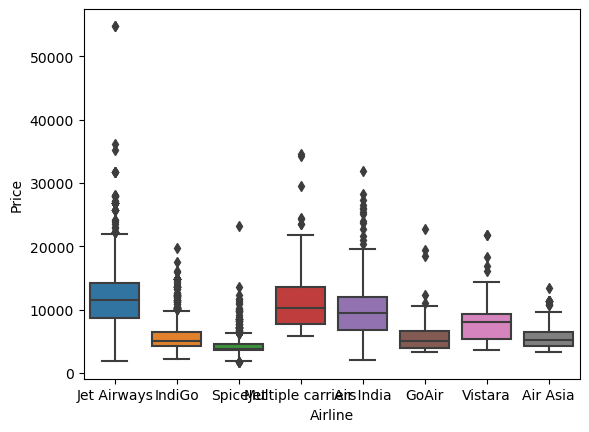

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Price'],
      dtype='object')
Airline
Air Asia              5192.0
Air India             9443.0
GoAir                 5003.5
IndiGo                5054.0
Jet Airways          11507.0
Multiple carriers    10197.0
SpiceJet              3873.0
Vistara               8028.0
Name: Price, dtype: float64
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Price              0
dtype: int64


In [68]:
#####################################
#  EDA Dealing with missing values
#####################################
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
planes = pd.read_csv("datasets/planes.csv")

display(planes.head(5))

#############################################################
#drop missing values if they account for a small proportion, 
#typically five percent, of the data.
#############################################################
#count the number of missing values across all columns, 
#calculate five percent of all values, 
#use this threshold to remove observations, 
#and check how many missing values remain in the dataset.

# Count the number of missing values in each column
print(planes.isna().sum())

# Find the five percent threshold
threshold = len(planes) * 0.05
print("\n")
print(threshold)
print("\n")

# Create a filter
cols_to_drop = planes.columns[planes.isna().sum() <= threshold]

# Drop missing values for columns below the threshold
planes.dropna(subset=cols_to_drop, inplace=True)

print(planes.isna().sum())
#Note for the two last columns, the number of NaN values decreases due to some rows dropped

#############################################
# Strategies for remaining missing data
#############################################
#take a look at what "Additional_Info" column contains, 
#then visualize the "Price" of plane tickets by different airlines.
print("\n")
# Check the values of the Additional_Info column
print(planes["Additional_Info"].value_counts())

# Create a box plot of Price by Airline
sns.boxplot(data=planes, y="Price", x="Airline")
plt.show()

#How deal with the missing values in "Additional_Info" and "Price"?
#Remove the "Additional_Info" column and 
#impute the median by "Airlines" for missing values of "Price"
#to accuratly represent the data
planes.drop(["Additional_Info"], axis=1, inplace=True)
print(planes.columns)

#Imputing missing plane prices
# Calculate median plane ticket prices by Airline
airline_prices = planes.groupby("Airline")["Price"].median()
print(airline_prices)

# Convert to a dictionary
prices_dict = airline_prices.to_dict()

# Map the dictionary to missing values of Price by Airline
planes["Price"] = planes["Price"].fillna(planes["Airline"].map(prices_dict))

# Check for missing values
print(planes.isna().sum())

#No more missing values!

Number of unique values in Airline column:  8
Number of unique values in Date_of_Journey column:  44
Number of unique values in Source column:  5
Number of unique values in Destination column:  6
Number of unique values in Route column:  122
Number of unique values in Dep_Time column:  218
Number of unique values in Arrival_Time column:  1220
Number of unique values in Duration column:  362
Number of unique values in Total_Stops column:  5
0        19h
1     5h 25m
2     4h 45m
3     2h 25m
4    15h 30m
Name: Duration, dtype: object


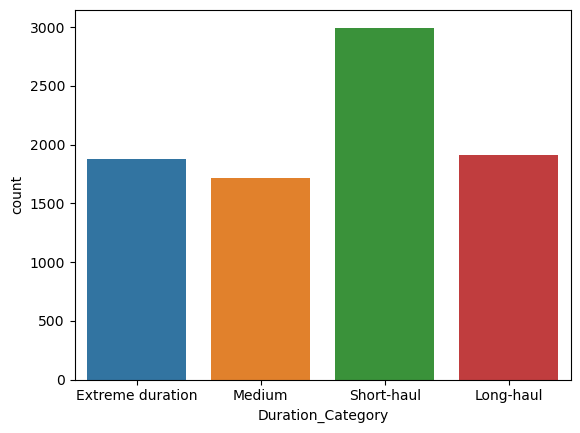

In [69]:
##################################################
#categorical data manipulation and analysis skills
##################################################
#Finding the number of unique values

# Filter the DataFrame for object columns
non_numeric = planes.select_dtypes("object")

# Loop through columns
for col in non_numeric.columns:
  # Print the number of unique values
  print(f"Number of unique values in {col} column: ", non_numeric[col].nunique())

#Flight duration categories
#there are 362 unique values in the "Duration" column of planes
#categorize flights by duration and examine the frequency of different flight lengths
#in 5steps
print(planes["Duration"].head())

#1 create a list of the values you would like to insert into the DataFrame, 
#followed by the existing values that these should be created from
# Create a list of categories
flight_categories = ["Short-haul", "Medium", "Long-haul"]

#2 Create short-haul values
short_flights = "^0h|^1h|^2h|^3h|^4h"
# Create medium-haul values
medium_flights = "^5h|^6h|^7h|^8h|^9h"
# Create long-haul values
long_flights = "10h|11h|12h|13h|14h|15h|16h"

#3 Adding duration categories
#Now that categories and values are created, 
#it's time to conditionally add the categories into the DataFrame.
# Create conditions for values in flight_categories to be created
conditions = [
    (planes["Duration"].str.contains(short_flights)),
    (planes["Duration"].str.contains(medium_flights)),
    (planes["Duration"].str.contains(long_flights))
]
#4 Apply the conditions list to the flight_categories
planes["Duration_Category"] = np.select(conditions, 
                                        flight_categories,
                                        default="Extreme duration")
#5 Plot the counts of each category
sns.countplot(data=planes, x="Duration_Category")
plt.show()
#Beautiful categorical transformation



0        19h
1     5h 25m
2     4h 45m
3     2h 25m
4    15h 30m
Name: Duration, dtype: object


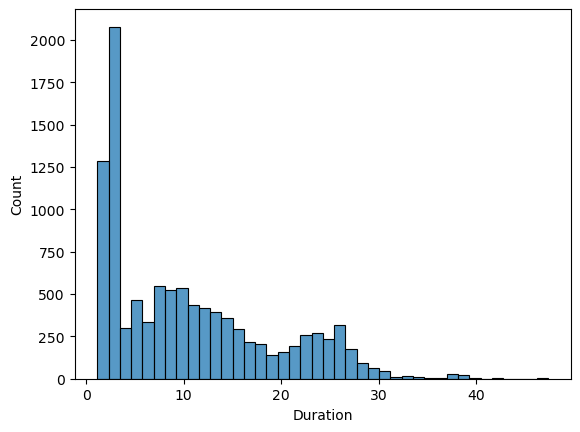

0    19.00
1     5.25
2     4.45
3     2.25
4    15.30
Name: Duration, dtype: float64


In [70]:
######################################
# Analyze Flight duration
#Converting String to numeric
######################################
planes = pd.read_csv("datasets/planes.csv")
print(planes["Duration"].head())

# Remove the string characters
planes["Duration"] = planes["Duration"].str.replace("h","")
planes["Duration"] = planes["Duration"].str.replace("m","")
planes["Duration"] = planes["Duration"].str.replace(" ",".")
# Convert to float data type
planes["Duration"] = planes["Duration"].astype(float)

# Plot a histogram
sns.histplot(data=planes,x="Duration")
plt.show()

print(planes["Duration"].head())


In [71]:
######################################
#Adding descriptive statistics
######################################
#"Duration" and "Price" both contain numeric values in the planes DataFrame, 
#calculate summary statistics for them that are conditional on values in other columns.
print(planes[["Duration","Price"]].info())

# Price standard deviation by Airline
planes["airline_price_st_dev"] = planes.groupby("Airline")["Price"].transform(lambda x: x.std())
print(planes[["Airline", "airline_price_st_dev"]].value_counts())

# Median Duration by Airline
planes["airline_median_duration"] = planes.groupby("Airline")["Duration"].transform(lambda x: x.median())
print(planes[["Airline","airline_median_duration"]].value_counts())

# Mean Price by Destination
planes["price_destination_mean"] = planes.groupby("Destination")["Price"].transform(lambda x: x.mean())
print(planes[["Destination","price_destination_mean"]].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10660 entries, 0 to 10659
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  10446 non-null  float64
 1   Price     10044 non-null  float64
dtypes: float64(2)
memory usage: 166.7 KB
None
Airline            airline_price_st_dev
Jet Airways        4230.748840             3685
IndiGo             2266.753552             1981
Air India          3865.871975             1686
Multiple carriers  3763.674706             1148
SpiceJet           1790.851944              787
Vistara            2864.267802              455
Air Asia           2016.738954              309
GoAir              2790.815129              182
dtype: int64
Airline            airline_median_duration
Jet Airways        13.20                      3685
IndiGo             2.55                       1981
Air India          15.55                      1686
Multiple carriers  10.15                      1148
Spice

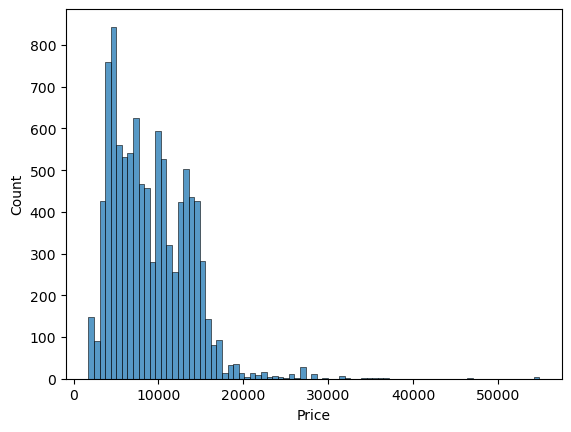

count    10446.000000
mean        10.561703
std          8.491360
min          1.150000
25%          2.500000
50%          8.400000
75%         15.350000
max         47.400000
Name: Duration, dtype: float64
count     9959.000000
mean      8875.160860
std       4057.202002
min       1759.000000
25%       5228.000000
50%       8283.000000
75%      12284.000000
max      23001.000000
Name: Price, dtype: float64


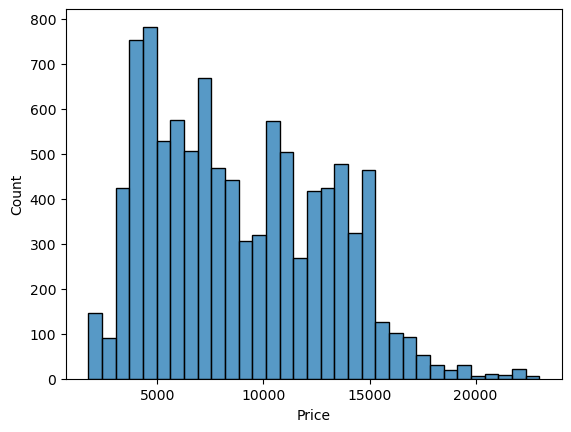

In [72]:
#############
# OUTLIERS
#############
#Identify outliers
# Plot a histogram of flight prices
sns.histplot(data=planes, x="Price")
plt.show()

# Display descriptive statistics for flight duration
print(planes["Duration"].describe())

# Price and Duration columns potentially contains outliers
#Histograms, boxplots, and descriptive statistics are also useful methods for identifying extreme values

#1 Removing outliers
# Find the 75th and 25th percentiles
price_seventy_fifth = planes["Price"].quantile(0.75)
price_twenty_fifth = planes["Price"].quantile(0.25)
# Calculate iqr
prices_iqr = price_seventy_fifth - price_twenty_fifth
# Calculate the thresholds
upper = price_seventy_fifth + (1.5 * prices_iqr)
lower = price_twenty_fifth - (1.5 * prices_iqr)
# Subset the data
planes_no_outliers = planes[(planes["Price"] > lower) & (planes["Price"] < upper)]
print(planes_no_outliers["Price"].describe())
#Originally the dataset had a maximum price of almost 55000, 
#but the output of planes.describe() shows the maximum has been reduced to around 23000, 
#reflecting a less skewed distribution for analysis!
sns.histplot(data=planes_no_outliers, x="Price")
plt.show()


In [73]:
#Class frequency for categorical data
print(planes["Destination"].value_counts())

#Relative class frequency
print(planes["Destination"].value_counts(normalize=True))
#knowing that 40% of Indian flights go to Delhi
#here in the sample Delhi represents 11.8% of destinations
#the data is not representative of the population for internal flights in India

#cross-tabulation, examine the frequency of combinations of classes
#look at flight route frequencies
display(pd.crosstab(planes["Source"], planes["Destination"]))
#the most popular route is from Delhi to Cochin, making up 4318 flights.

#Extended cross_tabulation
display(pd.crosstab(planes["Source"], planes["Destination"], values=planes["Price"], aggfunc="median"))
#The results show median values for all possible routes in the dataset.
#Compare the prices from the dataset with the expected values, 
#to see if the data are representative of the population

Cochin       4391
Banglore     2773
Delhi        1219
New Delhi     888
Hyderabad     673
Kolkata       369
Name: Destination, dtype: int64
Cochin       0.425773
Banglore     0.268884
Delhi        0.118200
New Delhi    0.086105
Hyderabad    0.065257
Kolkata      0.035780
Name: Destination, dtype: float64


Destination,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
Source,,,,,,
Banglore,0,0,1199,0,0,868
Chennai,0,0,0,0,364,0
Delhi,0,4318,0,0,0,0
Kolkata,2720,0,0,0,0,0
Mumbai,0,0,0,662,0,0


Destination,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
Source,,,,,,
Banglore,NaN,NaN,4823.0,NaN,NaN,10976.5
Chennai,NaN,NaN,NaN,NaN,3850.0,NaN
Delhi,NaN,10262.0,NaN,NaN,NaN,NaN
Kolkata,9345.0,NaN,NaN,NaN,NaN,NaN
Mumbai,NaN,NaN,NaN,3342.0,NaN,NaN


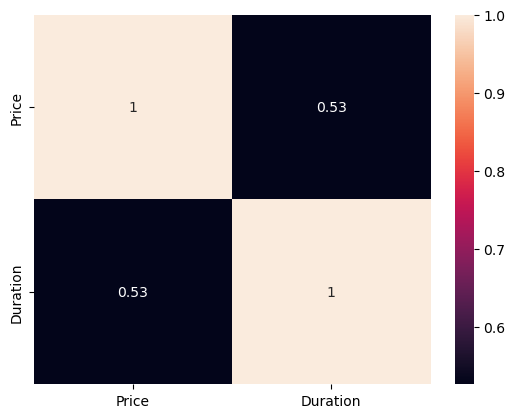

1 stop      5503
non-stop    3411
2 stops     1488
0            212
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64
212
0


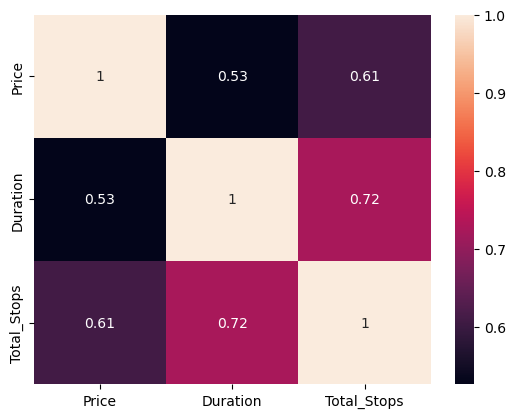

In [79]:
############################
# Generating new features
############################
import warnings
# Suppress FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)

# correlation
sns.heatmap(planes[["Price", "Duration"]].corr(), annot=True)
plt.show()
#There's a moderate positive correlation between Price and Duration

print(planes["Total_Stops"].value_counts())
#remove string characters, and change non-stop to zero, before converting the data type to integer
planes["Total_Stops"]= planes["Total_Stops"].str.replace(" stops", "")
planes["Total_Stops"]= planes["Total_Stops"].str.replace(" stop", "")
planes["Total_Stops"]= planes["Total_Stops"].str.replace("non-stop", "0")
planes["Total_Stops"].dtypes
print(planes["Total_Stops"].isna().sum())
planes["Total_Stops"] = planes["Total_Stops"].fillna(0)
print(planes["Total_Stops"].isna().sum())
planes["Total_Stops"]= planes["Total_Stops"].astype(int)

sns.heatmap(planes[["Price", "Duration","Total_Stops"]].corr(), annot=True)
plt.show()

Airline                            object
Date_of_Journey            datetime64[ns]
Source                             object
Destination                        object
Route                              object
Dep_Time                   datetime64[ns]
Arrival_Time               datetime64[ns]
Duration                          float64
Total_Stops                         int64
Additional_Info                    object
Price                             float64
airline_price_st_dev              float64
airline_median_duration           float64
price_destination_mean            float64
month                             float64
weekday                           float64
Dep_Hour                          float64
Arrival_Hour                      float64
dtype: object
       month  weekday Date_of_Journey
0        9.0      4.0      2019-09-06
1       12.0      3.0      2019-12-05
2        1.0      3.0      2019-01-03
3        6.0      0.0      2019-06-24
4       12.0      1.0      2019-12-03
..

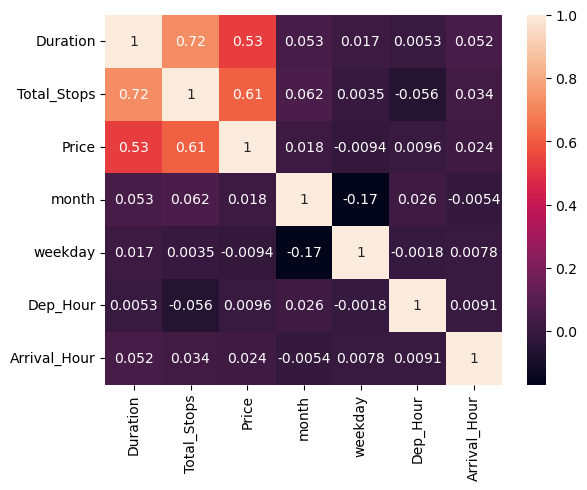

In [87]:
#################################
# Generating new features
#to search for new correlation
#################################
planes["Date_of_Journey"] = pd.to_datetime(planes["Date_of_Journey"])
planes["Dep_Time"] = pd.to_datetime(planes["Dep_Time"])
planes["Arrival_Time"] = pd.to_datetime(planes["Arrival_Time"])
print(planes.dtypes)

#Extracting month and weekday
#to see if Prices vary by month or even by week
planes["month"] = planes["Date_of_Journey"].dt.month
planes["weekday"] = planes["Date_of_Journey"].dt.weekday
print(planes[["month", "weekday", "Date_of_Journey"]])

#Do people tend to pay more to depart or arrive at more convenient times
planes["Dep_Hour"] = planes["Dep_Time"].dt.hour
planes["Arrival_Hour"] = planes["Arrival_Time"].dt.hour

#they are numeric so correlation an be correlated between these new datetime features and other variables
#Re-plotting the heatmap, unfortunately there aren't any new strong relationships. 
#But we wouldn't have known this if we hadn't generated these features.
sns.heatmap(planes[["Duration","Total_Stops","Price", "month", "weekday", "Dep_Hour","Arrival_Hour"]].corr(), annot=True)
plt.show()



count    10044.000000
mean      9044.411191
std       4472.304869
min       1759.000000
25%       5276.750000
50%       8366.000000
75%      12373.000000
max      54826.000000
Name: Price, dtype: float64
     Price   Price_Category
0  13882.0      First Class
1   6218.0  Premium Economy
2  13302.0      First Class
3   3873.0          Economy
4  11087.0   Business Class


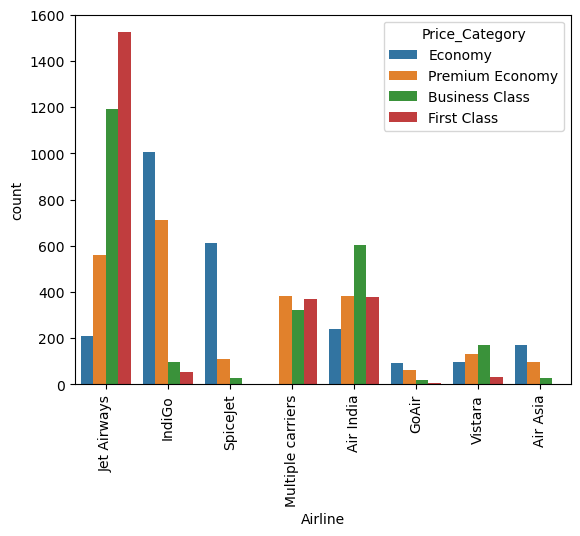

In [91]:
#################################
# Generating new features
#to search for new correlation
#################################
print(planes["Price"].describe())

#create a new column for ticket type per range
twenty_fifth = planes["Price"].quantile(0.25)
median = planes["Price"].median()
seventy_fifth = planes["Price"].quantile(0.75)
maximum = planes["Price"].max()

labels = ["Economy", "Premium Economy", "Business Class", "First Class"]
bins = [0, twenty_fifth, median, seventy_fifth, maximum ]

planes["Price_Category"] = pd.cut(planes["Price"], labels=labels, bins=bins)
print(planes[["Price", "Price_Category"]].head())
sns.countplot(data=planes, x="Airline", hue="Price_Category")
plt.xticks(rotation=90)
plt.show()

#Jet Airways has the largest number of "First Class" tickets, 
#while most of IndiGo and SpiceJet's flights are "Economy".
